In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import bambi as bmb
import seaborn as sns

In [2]:
eagles = pd.read_csv('bald_eagles.csv')
eagles

,Unnamed: 0,year,count,hours,count_per_hour,count_per_week
0,1,1981,0,167.00,0.000000,0.000000
1,2,1982,0,164.00,0.000000,0.000000
2,3,1983,0,168.00,0.000000,0.000000
3,4,1984,1,178.00,0.005618,0.943820
4,5,1985,2,143.00,0.013986,2.349650
5,6,1986,1,182.00,0.005495,0.923077
6,7,1987,1,166.50,0.006006,1.009009
7,8,1988,1,167.00,0.005988,1.005988
8,9,1989,1,157.00,0.006369,1.070064
9,10,1990,1,164.00,0.006098,1.024390


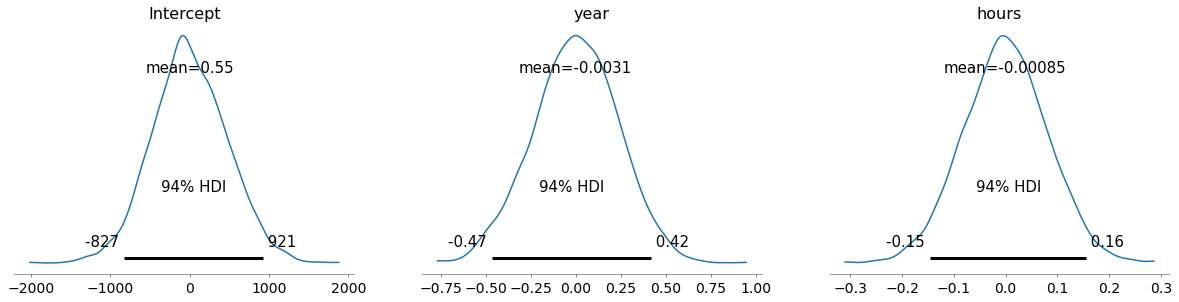

In [3]:
model1 = bmb.Model('count ~ year + hours', eagles, family='poisson')
model1.build()
model1.plot_priors();

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, year, hours]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 33 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-159.650,25.958,-208.393,-110.640,0.182,0.13,20448.0,22482.0,1.0
year,0.080,0.013,0.055,0.105,0.000,0.00,20406.0,22619.0,1.0
hours,0.003,0.004,-0.004,0.011,0.000,0.00,23800.0,24726.0,1.0


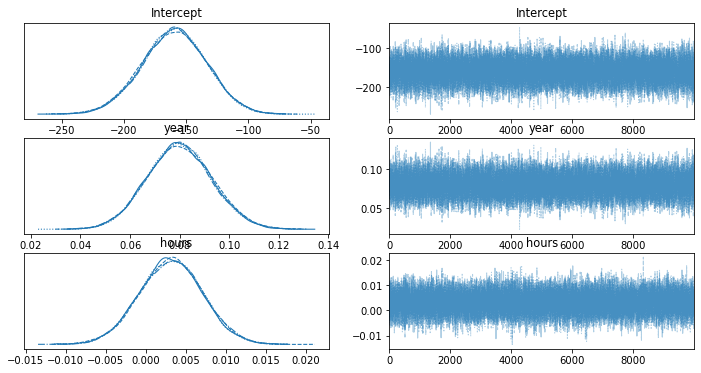

In [4]:
results1 = model1.fit(draws=10000, chains=4)
az.plot_trace(results1)
az.summary(results1)

The above takes only 44 seconds. Now try by hand:

In [17]:
 

with pm.Model( ) as EagleP:

    # define priors, weakly informative Normal
    b0 = pm.Normal("Intercept", mu=0, sigma=100)
    b1 = pm.Normal("year_slope", mu=0, sigma=.4)
    b2 = pm.Normal("hours_slope", mu=0, sigma=.1)

    Y = pm.ConstantData("year", (eagles["year"]-eagles["year"].min()).to_numpy())
    H = pm.ConstantData("hours", eagles["hours"].to_numpy())
    C = pm.ConstantData("count", eagles["count"].to_numpy())

    # define linear model and exp link function
    theta = np.exp(b0 + b1 * Y + b2 * H)  
     
    ## Define Poisson likelihood"
 
    y = pm.Poisson("y", mu=theta,observed=C)

In [18]:
with EagleP:
    samples = pm.sample(draws = 10000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, year_slope, hours_slope]


/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/ronaldlegere/opt/anaconda3/envs/BayesRules/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 61 seconds.


Takes SIGNIFICANTLY LONGER (more then 12 minutes) if you dont subtract the year 0 from the data.   With this simple change it takes about a minute

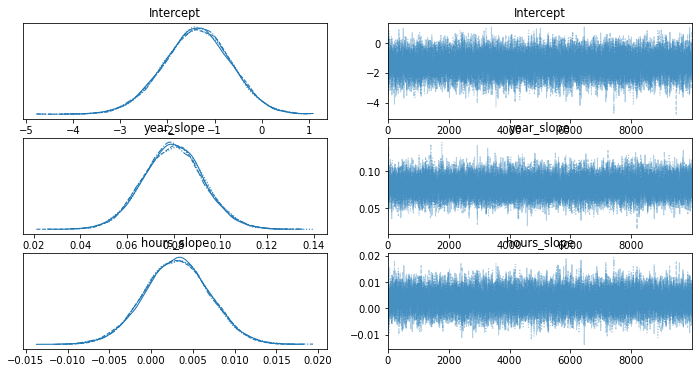

In [21]:
az.plot_trace(samples);

In [22]:
az.summary(samples)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.377,0.712,-2.724,-0.040,0.006,0.004,14412.0,16462.0,1.0
year_slope,0.080,0.013,0.056,0.105,0.000,0.000,16188.0,17274.0,1.0
hours_slope,0.003,0.004,-0.004,0.011,0.000,0.000,13707.0,14910.0,1.0
